In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
raw_data_path=os.path.join(os.path.pardir, 'data', 'raw')
train_file_path=os.path.join(raw_data_path, 'train.csv')
test_file_path=os.path.join(raw_data_path, 'test.csv')

In [4]:
# read the data with all default parameters
train_df=pd.read_csv(train_file_path, index_col='PassengerId')
test_df=pd.read_csv(test_file_path, index_col='PassengerId')

In [5]:
# get the type
type(train_df)

pandas.core.frame.DataFrame

### Basic Structure

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
test_df.info()
# Survived column is not present, it needs to be predicted based on training data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [8]:
test_df['Survived']=-888  # adding Survived column with default values

In [9]:
# now join train and test data. Columns are same 
df = pd.concat((train_df, test_df))

C:\Users\simra\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [11]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450


In [12]:
df.head(10)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0,17463
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,male,3,0,349909
9,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female,0,1,347742


In [13]:
df.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1305,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,3,male,0,-888,A.5. 3236
1306,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1,female,0,-888,PC 17758
1307,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,3,male,0,-888,SOTON/O.Q. 3101262
1308,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,3,male,0,-888,359309
1309,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,3,male,1,-888,2668


In [14]:
# Selection
df.Name

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
6                                        Moran, Mr. James
7                                 McCarthy, Mr. Timothy J
8                          Palsson, Master. Gosta Leonard
9       Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                    Nasser, Mrs. Nicholas (Adele Achem)
11                        Sandstrom, Miss. Marguerite Rut
12                               Bonnell, Miss. Elizabeth
13                         Saundercock, Mr. William Henry
14                            Andersson, Mr. Anders Johan
15                   Vestrom, Miss. Hulda Amanda Adolfina
16                       Hewlett, Mrs. (Mary D Kingcome) 
17                                   Rice, Master. Eugene
18

In [15]:
df['Name']

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
6                                        Moran, Mr. James
7                                 McCarthy, Mr. Timothy J
8                          Palsson, Master. Gosta Leonard
9       Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                    Nasser, Mrs. Nicholas (Adele Achem)
11                        Sandstrom, Miss. Marguerite Rut
12                               Bonnell, Miss. Elizabeth
13                         Saundercock, Mr. William Henry
14                            Andersson, Mr. Anders Johan
15                   Vestrom, Miss. Hulda Amanda Adolfina
16                       Hewlett, Mrs. (Mary D Kingcome) 
17                                   Rice, Master. Eugene
18

In [16]:
df[['Name', 'Age']]

,Name,Age
PassengerId,,
1,"Braund, Mr. Owen Harris",22.0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
3,"Heikkinen, Miss. Laina",26.0
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
5,"Allen, Mr. William Henry",35.0
6,"Moran, Mr. James",NaN
7,"McCarthy, Mr. Timothy J",54.0
8,"Palsson, Master. Gosta Leonard",2.0
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0


In [17]:
# Indexing
# use loc for label based indexing
df.loc[5:10,]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0,17463
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,male,3,0,349909
9,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female,0,1,347742
10,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,2,female,1,1,237736


In [18]:
df.loc[5:10, 'Age':'Pclass']

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass
PassengerId,,,,,,,
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3
9,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3
10,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,2


In [19]:
df.loc[5:10, ['Age', 'Cabin', 'Survived']]

,Age,Cabin,Survived
PassengerId,,,
5,35.0,NaN,0
6,NaN,NaN,0
7,54.0,E46,0
8,2.0,NaN,0
9,27.0,NaN,1
10,14.0,NaN,1


In [20]:
# use iloc for position based testing
df.iloc[5:10, 3:8]

,Fare,Name,Parch,Pclass,Sex
PassengerId,,,,,
6,8.4583,"Moran, Mr. James",0,3,male
7,51.8625,"McCarthy, Mr. Timothy J",0,1,male
8,21.0750,"Palsson, Master. Gosta Leonard",1,3,male
9,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female
10,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,2,female


In [21]:
# Filtering
# filter rows based on the conditions
male_passengers = df.loc[df.Sex == 'male',:]
print('Number of male passenger: {}'.format(len(male_passengers)))

Number of male passenger: 843


In [22]:
male_passengers_first_class = df.loc[((df.Sex == 'male') & (df.Pclass == 1)),:]
print('Number of male passengers in First class {}'.format(len(male_passengers_first_class)))

Number of male passengers in First class 179


### Summary Statistics

In [23]:
df.describe()

,Age,Fare,Parch,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,-283.301757
std,14.413493,51.758668,0.865560,0.837836,1.041658,414.337413
min,0.170000,0.000000,0.000000,1.000000,0.000000,-888.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,-888.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


In [24]:
# numerical features
# centrality measures
print('Mean fare : {0}'.format(df.Fare.mean()))

Mean fare : 33.2954792813456


In [25]:
print('Median fare : {0}'.format(df.Fare.median()))

Median fare : 14.4542


In [26]:
# dispersion measures
print('Mean fare : {0}'.format(df.Fare.min()))
print('Max fare : {0}'.format(df.Fare.max()))
print('Fare range : {0}'.format(df.Fare.max() - df.Fare.min()))
print('25 percentile : {0}'.format(df.Fare.quantile(.25)))
print('50 percentile : {0}'.format(df.Fare.quantile(.50)))
print('75 percentile : {0}'.format(df.Fare.quantile(.75)))
print('Variance fare : {0}'.format(df.Fare.var()))
print('Standard deviation fare : {0}'.format(df.Fare.std()))

Mean fare : 0.0
Max fare : 512.3292
Fare range : 512.3292
25 percentile : 7.8958
50 percentile : 14.4542
75 percentile : 31.275
Variance fare : 2678.959737892894
Standard deviation fare : 51.75866823917414


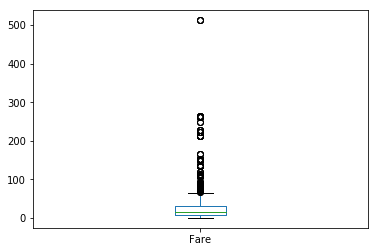

In [27]:
%matplotlib inline 
# box - whisker plot
df.Fare.plot(kind='box')

In [28]:
df.describe(include='all')

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
count,1046.000000,295,1307,1308.000000,1309,1309.000000,1309.000000,1309,1309.000000,1309.000000,1309
unique,NaN,186,3,NaN,1307,NaN,NaN,2,NaN,NaN,929
top,NaN,C23 C25 C27,S,NaN,"Connolly, Miss. Kate",NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,6,914,NaN,2,NaN,NaN,843,NaN,NaN,11
mean,29.881138,NaN,NaN,33.295479,NaN,0.385027,2.294882,NaN,0.498854,-283.301757,NaN
std,14.413493,NaN,NaN,51.758668,NaN,0.865560,0.837836,NaN,1.041658,414.337413,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,NaN,0.000000,-888.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,2.000000,NaN,0.000000,-888.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,3.000000,NaN,1.000000,1.000000,NaN


In [29]:
# Categorical columns - Counts
df.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [30]:
# Categorical columns - Proportions
df.Sex.value_counts(normalize = True)

male      0.644003
female    0.355997
Name: Sex, dtype: float64

In [31]:
df[df.Survived !=-888].Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [32]:
df.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

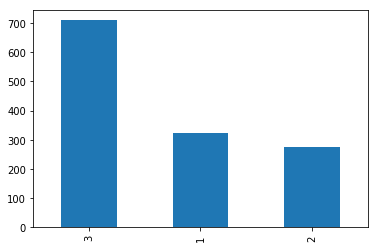

In [33]:
df.Pclass.value_counts().plot(kind = 'bar')

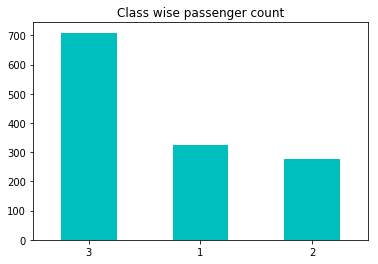

In [34]:
df.Pclass.value_counts().plot(kind = 'bar', rot = 0, title = 'Class wise passenger count', color = 'c')

### Distributions

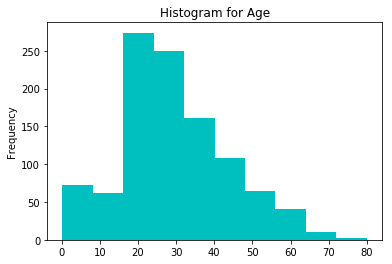

In [35]:
#Univariate:
# Histogram
df.Age.plot(kind='hist', title='Histogram for Age', color='c')

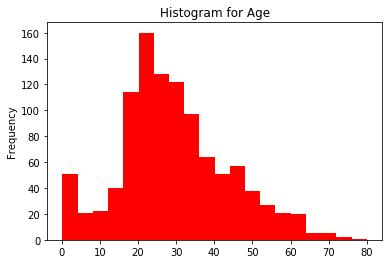

In [36]:
# Bins
df.Age.plot(kind='hist', title='Histogram for Age', color='r', bins=20)

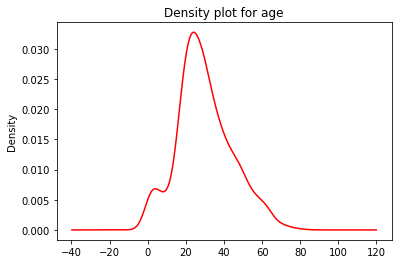

In [37]:
# kde (Kernel Density Estimation) for density plot
df.Age.plot(kind='kde', title='Density plot for age', color='r')

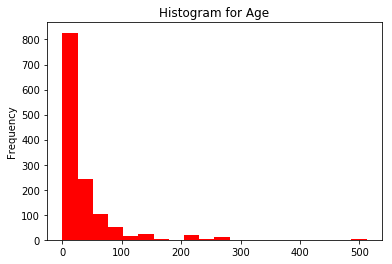

In [38]:
# Histogram for fare
df.Fare.plot(kind='hist', title='Histogram for Age', color='r', bins=20)

In [40]:
print('Skewness for Age: {0: .2f}'.format(df.Age.skew()))
print('Skewness for Fare: {0: .2f}'.format(df.Fare.skew()))

Skewness for Age:  0.41
Skewness for Fare:  4.37


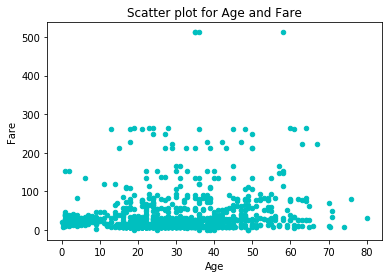

In [41]:
# Bivariate:
# Scatter Plot
df.plot.scatter(x='Age', y='Fare', color='c', title='Scatter plot for Age and Fare')

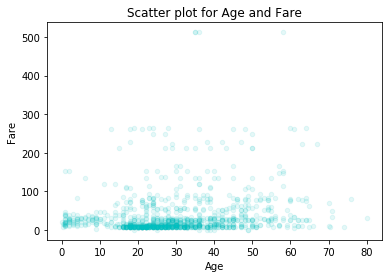

In [42]:
# Use alpha to set transparency
df.plot.scatter(x='Age', y='Fare', color='c', title='Scatter plot for Age and Fare', alpha=0.1)

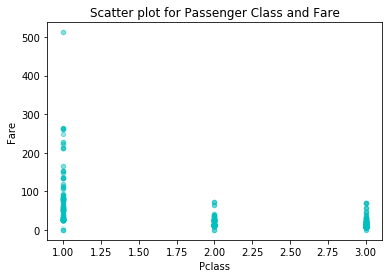

In [43]:
df.plot.scatter(x='Pclass', y='Fare', color='c', title='Scatter plot for Passenger Class and Fare', alpha=0.15)

### Grouping and Aggregations

In [44]:
# group by
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

In [45]:
df.groupby('Pclass').Fare.median()

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [46]:
df.groupby('Pclass').Age.median()

Pclass
1    39.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [47]:
df.groupby(['Pclass'])['Fare', 'Age'].median()

,Fare,Age
Pclass,,
1,60.0000,39.0
2,15.0458,29.0
3,8.0500,24.0


In [48]:
# Aggregations
df.groupby(['Pclass']).agg({'Fare': 'mean', 'Age': 'median'})

,Fare,Age
Pclass,,
1,87.508992,39.0
2,21.179196,29.0
3,13.302889,24.0


In [50]:
# more complicated aggregations
aggregations = {
    'Fare': {
          'mean_Fare': 'mean',
          'median_Fare': 'median',
          'max_Fare': max,
          'min_Fare': np.min
         },
    'Age': {
          'median_Age': 'median',
          'min_Age': min,
          'max_Age': max,
          'range_Age': lambda x: max(x) - min(x)
          }
}

In [51]:
df.groupby(['Pclass']).agg(aggregations)

C:\Users\simra\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Fare                                       Age                  \
        mean_Fare median_Fare  max_Fare min_Fare median_Age min_Age max_Age   
Pclass                                                                        
1       87.508992     60.0000  512.3292      0.0       39.0    0.92    80.0   
2       21.179196     15.0458   73.5000      0.0       29.0    0.67    70.0   
3       13.302889      8.0500   69.5500      0.0       24.0    0.17    74.0   

                  
       range_Age  
Pclass            
1          79.08  
2          69.33  
3          73.83

In [52]:
df.groupby(['Pclass', 'Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [53]:
# Crosstabs
pd.crosstab(df.Sex, df.Pclass)

Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


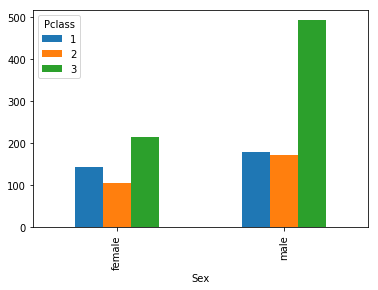

In [54]:
pd.crosstab(df.Sex, df.Pclass).plot(kind='bar')

In [56]:
# Pivot table
df.pivot_table(index='Sex', columns='Pclass', values='Age', aggfunc='mean')


Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


In [57]:
df.groupby(['Sex','Pclass']).Age.mean()

Sex     Pclass
female  1         37.037594
        2         27.499223
        3         22.185329
male    1         41.029272
        2         30.815380
        3         25.962264
Name: Age, dtype: float64

In [58]:
df.groupby(['Sex', 'Pclass']).Age.mean().unstack()

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264
